In [108]:
import pandas as pd

data_path='data/heart.csv'

dataframe = pd.read_csv(data_path)
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [109]:
dataframe.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [110]:
dataframe.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [111]:
dataframe.shape

(918, 12)

In [112]:
dataframe.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [113]:
cpt = pd.get_dummies(dataframe.ChestPainType, prefix='cpt')
dataframe = dataframe.join(cpt)

dataframe.drop('ChestPainType', axis=1, inplace=True)

sex = pd.get_dummies(dataframe.Sex, prefix='sex')
dataframe = dataframe.join(sex)

dataframe.drop('Sex', axis=1, inplace=True)


ecg = pd.get_dummies(dataframe.RestingECG, prefix='ecg')
dataframe = dataframe.join(ecg)

dataframe.drop('RestingECG', axis=1, inplace=True)

ea = pd.get_dummies(dataframe.ExerciseAngina, prefix='ea')
dataframe = dataframe.join(ea)

dataframe.drop('ExerciseAngina', axis=1, inplace=True)


In [114]:
dataframe.corr()

C:\Users\thunb\AppData\Local\Temp\ipykernel_25800\4279439629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,cpt_ASY,cpt_ATA,cpt_NAP,cpt_TA,sex_F,sex_M,ecg_LVH,ecg_Normal,ecg_ST,ea_N,ea_Y
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.166607,-0.218165,-0.011335,0.032042,-0.055750,0.055750,0.145727,-0.230566,0.136798,-0.215793,0.215793
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.048824,-0.046153,-0.041348,0.049855,-0.005133,0.005133,0.053166,-0.116851,0.090447,-0.155101,0.155101
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.120531,0.150954,-0.006634,0.017365,0.200092,-0.200092,0.177077,-0.038470,-0.133106,0.034166,-0.034166
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.131176,-0.140514,-0.039249,0.026885,-0.120076,0.120076,-0.011656,-0.093028,0.127110,-0.060451,0.060451
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.354963,0.253735,0.134580,0.100025,0.189186,-0.189186,0.125793,0.023801,-0.157879,0.370425,-0.370425
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.280026,-0.262124,-0.106212,0.032231,-0.105734,0.105734,0.086794,-0.116719,0.055958,-0.408752,0.408752
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.516716,-0.401924,-0.212964,-0.054790,-0.305445,0.305445,0.010670,-0.091580,0.102527,-0.494282,0.494282
cpt_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,1.000000,-0.522432,-0.577670,-0.249003,-0.183876,0.183876,0.002289,-0.063606,0.076438,-0.430034,0.430034
cpt_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.522432,1.000000,-0.256767,-0.110679,0.161522,-0.161522,-0.085791,0.107941,-0.046111,0.300365,-0.300365
cpt_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.577670,-0.256767,1.000000,-0.122381,0.066486,-0.066486,0.035299,0.005010,-0.042236,0.166030,-0.166030


Jag kör en corr() för att se samband mellan HeartDisease och de andra kolumnerna. Vi kan se att EKG testerna inte har jättehög korrelation, jag trodde det skulle vara högre. Däremot har Oldpeak väldigt hög korrelation vilket är data från EKG testerna. Oldpeak är mängden sänkning i st-sänkningen. 

Jag tar bort de kolumnerna som inte har så hög korrelation.

In [119]:
df_small = dataframe[['Age', 'HeartDisease', 'cpt_ASY', 'cpt_ATA', 'sex_F', 'sex_M', 'MaxHR', 'Oldpeak', 'ea_N', 'ea_Y']]
corr = df_small.corr()
corr

,Age,HeartDisease,cpt_ASY,cpt_ATA,sex_F,sex_M,MaxHR,Oldpeak,ea_N,ea_Y
Age,1.000000,0.282039,0.166607,-0.218165,-0.055750,0.055750,-0.382045,0.258612,-0.215793,0.215793
HeartDisease,0.282039,1.000000,0.516716,-0.401924,-0.305445,0.305445,-0.400421,0.403951,-0.494282,0.494282
cpt_ASY,0.166607,0.516716,1.000000,-0.522432,-0.183876,0.183876,-0.354963,0.280026,-0.430034,0.430034
cpt_ATA,-0.218165,-0.401924,-0.522432,1.000000,0.161522,-0.161522,0.253735,-0.262124,0.300365,-0.300365
sex_F,-0.055750,-0.305445,-0.183876,0.161522,1.000000,-1.000000,0.189186,-0.105734,0.190664,-0.190664
sex_M,0.055750,0.305445,0.183876,-0.161522,-1.000000,1.000000,-0.189186,0.105734,-0.190664,0.190664
MaxHR,-0.382045,-0.400421,-0.354963,0.253735,0.189186,-0.189186,1.000000,-0.160691,0.370425,-0.370425
Oldpeak,0.258612,0.403951,0.280026,-0.262124,-0.105734,0.105734,-0.160691,1.000000,-0.408752,0.408752
ea_N,-0.215793,-0.494282,-0.430034,0.300365,0.190664,-0.190664,0.370425,-0.408752,1.000000,-1.000000
ea_Y,0.215793,0.494282,0.430034,-0.300365,-0.190664,0.190664,-0.370425,0.408752,-1.000000,1.000000


<AxesSubplot: >

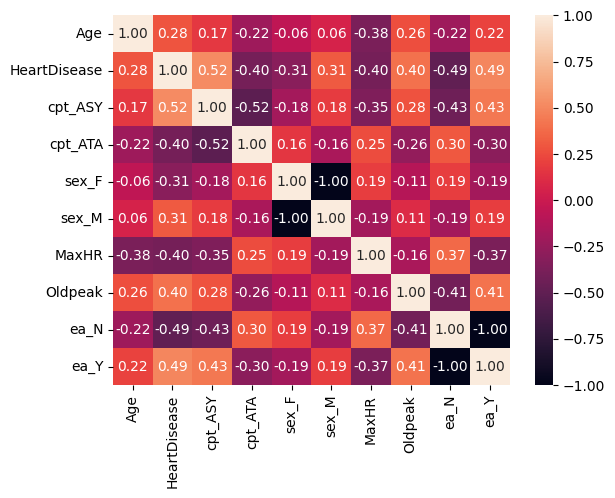

In [120]:
import seaborn as sns

sns.heatmap(corr, annot=True, fmt='.2f')

Som vi kan se här är vi ganska hög korrelation med dessa utvalda kolumnerna gentemot HeartDisease, vilket gör datasetet intressant.

In [117]:
dataframe.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,cpt_ASY,cpt_ATA,cpt_NAP,cpt_TA,sex_F,sex_M,ecg_LVH,ecg_Normal,ecg_ST,ea_N,ea_Y
0,40,140,289,0,172,0.0,Up,0,0,1,0,0,0,1,0,1,0,1,0
1,49,160,180,0,156,1.0,Flat,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,Up,0,0,1,0,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,Flat,1,1,0,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,Up,0,0,0,1,0,0,1,0,1,0,1,0
5,39,120,339,0,170,0.0,Up,0,0,0,1,0,0,1,0,1,0,1,0
6,45,130,237,0,170,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0
7,54,110,208,0,142,0.0,Up,0,0,1,0,0,0,1,0,1,0,1,0
8,37,140,207,0,130,1.5,Flat,1,1,0,0,0,0,1,0,1,0,0,1
9,48,120,284,0,120,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0


In [121]:
dataframe.groupby(['sex_M', 'HeartDisease']).count()


Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
sex_M HeartDisease                                                           
0     0             143        143          143        143    143      143   
      1              50         50           50         50     50       50   
1     0             267        267          267        267    267      267   
      1             458        458          458        458    458      458   

                    ST_Slope  cpt_ASY  cpt_ATA  cpt_NAP  cpt_TA  sex_F  \
sex_M HeartDisease                                                       
0     0                  143      143      143      143     143    143   
      1                   50       50       50       50      50     50   
1     0                  267      267      267      267     267    267   
      1                  458      458      458      458     458    458   

                    ecg_LVH  ecg_Normal  ecg_ST  ea_N  ea_Y  
sex_M HeartDisease                                           
0     0                 143         143     143   143   143  
      1                  50          50      50    50    50  
1     0                 267         267     267   267   267  
      1                 458         458     458   458   458